In [1]:
from fits_dataclass import Image, ImageSet, Transform
import matplotlib.pyplot as plt
import fitsio
import numpy as np
import copy

In [2]:
# TODO: figure out why fitsio can't read the headers!
    # -- Temporary fix: switch to old version of fits io
    #   from before the C library was implemented
    # -- Long term fix: Update C library cfitsio (NASA)
# TODO: use Image dataclass to bundle data & headers

#Just load data w/o header info for now

europa = {}
std = {}

### H&K Bands: central wave = 1.95 : 1.45 – 2.45 microns ###
# 10-4-2011: Europa 225 W
path = 'ESO_pipeline_output/2011_10_04/2020-05-28T15:52:38/SINFO.2011-10-04T08_00_53.107_tpl/'
imgs = ['MOV_Europa225_OBS_OBJ.fits', 'MOV_Europa225_OBS_OBJ_1.fits', 'MOV_Europa225_OBS_OBJ_2.fits',
        'MOV_Europa225_OBS_OBJ_3.fits', 'MOV_Europa225_OBS_OBJ_4.fits']
europa['225'] = ImageSet([Image.load(path+img) for img in imgs])
std['225'] = Image.load('ESO_pipeline_output/2011_10_04/2020-05-28T15:52:38/SINFO.2011-10-04T09_11_23.583_tpl/Telluric_Standard_OBS_STD.fits')

# 10-5-2011: Europa 315 W
path = 'ESO_pipeline_output/2011_10_05/2020-05-28T16:16:21/SINFO.2011-10-05T05_05_01.074_tpl/'
imgs = ['MOV_Europa315_OBS_OBJ.fits', 'MOV_Europa315_OBS_OBJ_1.fits', 'MOV_Europa315_OBS_OBJ_2.fits',
        'MOV_Europa315_OBS_OBJ_3.fits', 'MOV_Europa315_OBS_OBJ_4.fits']
europa['315'] = ImageSet([Image.load(path+img) for img in imgs])
std['315'] = Image.load('ESO_pipeline_output/2011_10_05/2020-05-28T16:16:21/SINFO.2011-10-05T05_55_00.094_tpl/CAL_Europa315_OBS_STD.fits')

# 10-21-2011: Europa 130 W
path = 'ESO_pipeline_output/2011_10_21/2020-05-28T16:41:14/SINFO.2011-10-21T03_39_05.632_tpl/'
imgs = ['MOV_Europa135_OBS_OBJ.fits', 'MOV_Europa135_OBS_OBJ_1.fits', 'MOV_Europa135_OBS_OBJ_2.fits',
        'MOV_Europa135_OBS_OBJ_3.fits', 'MOV_Europa135_OBS_OBJ_4.fits']
europa['130'] = ImageSet([Image.load(path+img) for img in imgs])
std['130'] = Image.load('ESO_pipeline_output/2011_10_21/2020-05-28T16:41:14/SINFO.2011-10-21T04_34_20.970_tpl/CAL_Europa135_OBS_STD.fits')

# 1-3-2012: Europa 55 W
path = 'ESO_pipeline_output/2012_01_03/2020-05-28T17:07:33/SINFO.2012-01-03T01_38_59.649_tpl/'
imgs = ['MOV_Europa045_OBS_OBJ.fits', 'MOV_Europa045_OBS_OBJ_1.fits', 'MOV_Europa045_OBS_OBJ_2.fits',
        'MOV_Europa045_OBS_OBJ_3.fits', 'MOV_Europa045_OBS_OBJ_4.fits']
europa['55'] = ImageSet([Image.load(path+img) for img in imgs])
std['55'] = Image.load('ESO_pipeline_output/2012_01_03/2020-05-28T17:07:33/SINFO.2012-01-03T02_58_36.943_tpl/Telluric_Standard_OBS_STD.fits')

# 1-17-2012: Europa 30 W
path = 'ESO_pipeline_output/2012_01_17/2020-05-28T17:27:50/SINFO.2012-01-17T01_08_20.397_tpl/'
imgs = ['MOV_Europa045_OBS_OBJ.fits', 'MOV_Europa045_OBS_OBJ_1.fits', 'MOV_Europa045_OBS_OBJ_2.fits',
        'MOV_Europa045_OBS_OBJ_3.fits', 'MOV_Europa045_OBS_OBJ_4.fits']
europa['30'] = ImageSet([Image.load(path+img) for img in imgs])
std['30'] = Image.load('ESO_pipeline_output/2012_01_17/2020-05-28T17:27:50/SINFO.2012-01-17T02_03_40.428_tpl/CAL_Europa045_OBS_STD.fits')

### J- Band: central wave = 1.25 L 1.10 – 1.40 microns ###

europa_J = {}
std_J = {}
# 4-21-2017: Europa 225 W
path = 'ESO_pipeline_output/2017_04_21/2020-05-28T17:40:53/SINFO.2017-04-21T04_57_25.234_tpl/'
imgs = ['MOV_Europa_225_OBS_OBJ.fits', 'MOV_Europa_225_OBS_OBJ_1.fits', 'MOV_Europa_225_OBS_OBJ_2.fits',
        'MOV_Europa_225_OBS_OBJ_3.fits', 'MOV_Europa_225_OBS_OBJ_4.fits']
europa['225_J'] = ImageSet([Image.load(path+img) for img in imgs])
std['225_J'] = Image.load('ESO_pipeline_output/2017_04_21/2020-05-28T17:40:53/SINFO.2017-04-21T05_18_07.955_tpl/Telluric_Standard_OBS_STD.fits')


# 4-22-2017: Europa 315 W
path = 'ESO_pipeline_output/2017_04_22/2020-05-28T18:54:50/SINFO.2017-04-22T02_12_00.399_tpl/'
imgs = ['MOV_Europa_315_OBS_OBJ.fits', 'MOV_Europa_315_OBS_OBJ_1.fits', 'MOV_Europa_315_OBS_OBJ_2.fits',
        'MOV_Europa_315_OBS_OBJ_3.fits', 'MOV_Europa_315_OBS_OBJ_4.fits']
europa['315_J'] = ImageSet([Image.load(path+img) for img in imgs])
std['315_J'] = Image.load('ESO_pipeline_output/2017_04_22/2020-05-28T18:54:50/SINFO.2017-04-22T02_33_55.744_tpl/Telluric_Standard_OBS_STD.fits')

# 4-26-2017: Europa 35 W
path = 'ESO_pipeline_output/2017_04_26/2020-05-28T19:04:50/SINFO.2017-04-26T05_02_25.659_tpl/'
imgs = ['MOV_Europa_35_OBS_OBJ.fits', 'MOV_Europa_35_OBS_OBJ_1.fits', 'MOV_Europa_35_OBS_OBJ_2.fits',
        'MOV_Europa_35_OBS_OBJ_3.fits', 'MOV_Europa_35_OBS_OBJ_4.fits']
europa['35_J'] = ImageSet([Image.load(path+img) for img in imgs])
std['35_J'] = Image.load('ESO_pipeline_output/2017_04_26/2020-05-28T19:04:50/SINFO.2017-04-26T05_19_38.493_tpl/Telluric_Standard_OBS_STD.fits')


In [3]:
def get_wave(img):
    #TO DO: Add wavelength to Image dataclass i.e. spectral cube
    cen_lambda = img.header['CRVAL3']
    cen_pix = int(img.header['CRPIX3'])
    micron_per_pix = img.header['CDELT3']
    
    wave = np.zeros(img.shape[0])
    for i in range(img.shape[0]):
        wave[i] = cen_lambda + (i-cen_pix)*micron_per_pix
    
    return wave

## Step 1: Telluric Correction

- Initial pass:

    - Europa/tell_star
        - box containing as much star light as possible

In [4]:
def get_center(img):
    """ Return the center x,y coordinate of a reference star in 
    an image using gaussian centering."""

    from photutils import centroid_2dg
    x, y = centroid_2dg(img)
    return (x,y)

In [5]:
def telluric_correct(img, std, box_size=30):
    '''Perform telluric star division on an image.
    
    INPUTS:
        img: Image: image to be corrected (Europa)
        std: Image: standard star image
        box_size: int: size of box to sum std star'''
    
    #Get center of std star at mid-wavelength
    cen_wave = int(img.data.shape[0]/2)
    x,y=get_center(std.data[cen_wave])
    
    #Sum std star in a box of width box_size around the center
    summed = np.array([np.sum(std.data[i][int(x-box_size/2):int(x+box_size/2),
                                        int(y-box_size/2):int(y+box_size/2)]
                             ) for i in range(std.shape[0])])
    
    #Divide each spaxel by summed
    
    #TO DO: assert len(summed) == len(spaxel)
    
    
    div = np.zeros(img.data.shape)

    for i in range(img.data.shape[1]):
        for j in range(img.data.shape[2]):
        
            div[:,i,j] = img.data[:,i,j].data/summed
    
    #Add std star file name to img header
    h = copy.copy(img.header)
    h['StdCorr'] = std.header['ARCFILE']
         
    return Image(_data=div, header=h)
    
    

In [6]:
# Run telluric correction on ALL data
tel_cor = {}

#For each night
for key in europa.keys():
    #Telluric correct each Europa cube
    tel_cor[key] = [telluric_correct(img, std[key]) 
                    for img in europa[key]]
    
        

KeyboardInterrupt: 

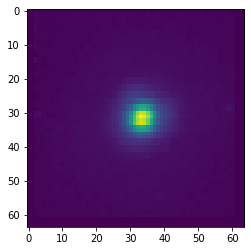

In [7]:
plt.imshow(std['225'].data[2000])

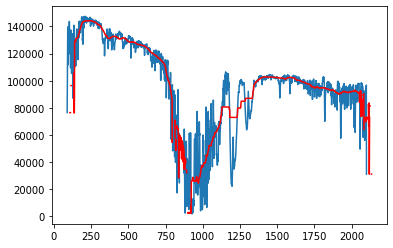

In [8]:
from scipy.ndimage import median_filter
summed = [np.sum(std['225'].data[i][20:50,20:50]) for i in range(std['225'].shape[0])]

plt.plot(summed)
plt.plot(median_filter(summed, size=100), 'r')

In [9]:
#TO DO: See if warnings are important!

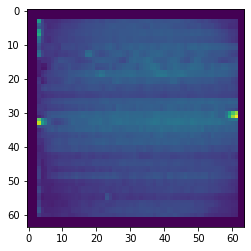

In [10]:
plt.imshow(tel_cor['30'][0].data[1000])



(0.0, 0.25)

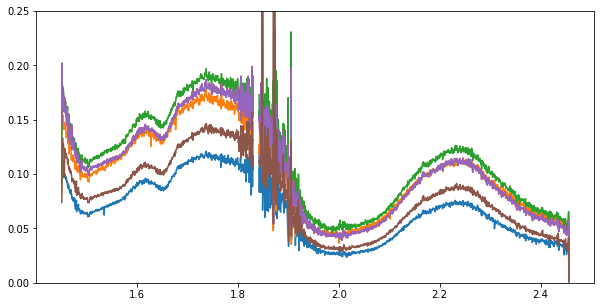

In [11]:
#Sample Std Corrected Spectrum across disk centered at 30W
fig = plt.figure(figsize=(10,5))
wave = get_wave(tel_cor['30'][0])
plt.plot(wave, tel_cor['30'][0].data[:,10,10])
plt.plot(wave, tel_cor['30'][0].data[:,20,20])
plt.plot(wave, tel_cor['30'][0].data[:,30,30])
plt.plot(wave, tel_cor['30'][0].data[:,40,40])
plt.plot(wave, tel_cor['30'][0].data[:,40,40])
plt.plot(wave, tel_cor['30'][0].data[:,50,50])
                
plt.ylim(0,0.25)

(0.0, 0.2)

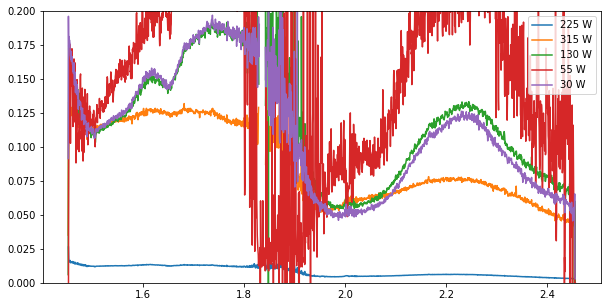

In [12]:
#See telluric corrected center of disk for different nights
fig = plt.figure(figsize=(10,5))

for key in tel_cor.keys():
    if 'J' not in key:
        wave = get_wave(tel_cor[key][0])
        plt.plot(wave, tel_cor[key][0].data[:,30,30], label=key+' W')

plt.legend()
plt.ylim(0,0.2)


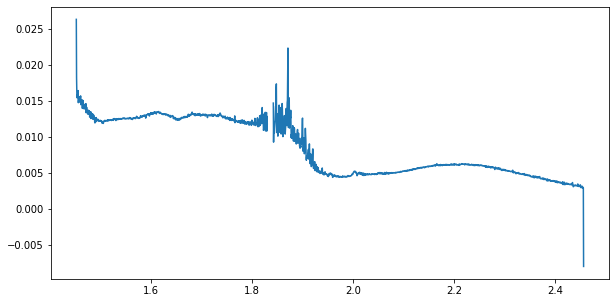

In [13]:
fig = plt.figure(figsize=(10,5))
plt.plot(wave, tel_cor['225'][0].data[:,30,30])

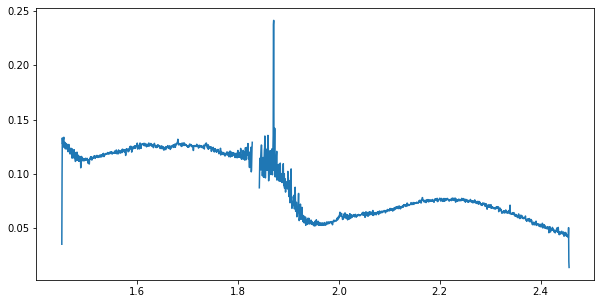

In [14]:
fig = plt.figure(figsize=(10,5))
plt.plot(wave, tel_cor['315'][0].data[:,30,30])

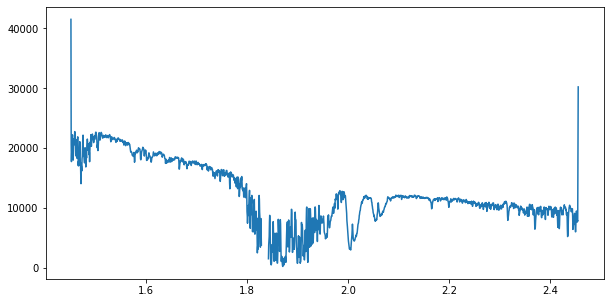

In [15]:
#Sample for plotting
#To Do: Add ability to plot
#       split up tel_cor function into smaller functions
box_size = 30

img = std['315']
#Get center of std star at mid-wavelength
cen_wave = int(img.data.shape[0]/2)
x,y=get_center(img.data[cen_wave])

#Sum std star in a box of width box_size around the center
summed = np.array([np.sum(img.data[i][int(x-box_size/2):int(x+box_size/2),
                                        int(y-box_size/2):int(y+box_size/2)]
                             ) for i in range(img.shape[0])])
fig = plt.figure(figsize=(10,5))
plt.plot(wave, summed)

(0.0, 12500.0)

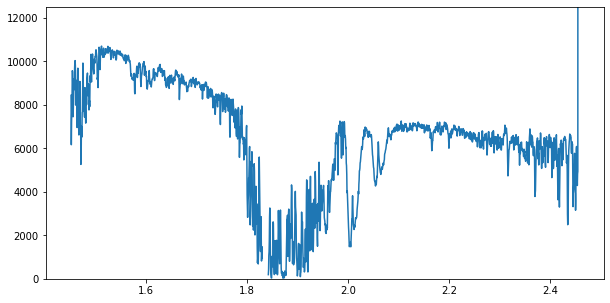

In [16]:
box_size = 30

img = std['30']
#Get center of std star at mid-wavelength
cen_wave = int(img.data.shape[0]/2)
x,y=get_center(img.data[cen_wave])

#Sum std star in a box of width box_size around the center
summed = np.array([np.sum(img.data[i][int(x-box_size/2):int(x+box_size/2),
                                        int(y-box_size/2):int(y+box_size/2)]
                             ) for i in range(img.shape[0])])
fig = plt.figure(figsize=(10,5))
plt.plot(wave, summed)
plt.ylim(0,12500)


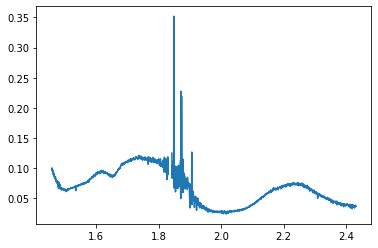

In [17]:
plt.plot(wave[100:2050], tel_cor['30'][0].data[100:2050,10,10])

## Mosaic Reconstruction

In [ ]:
#Plot mosaics

for key in tel_cor.keys():
    print(key)
    fig, ax = plt.subplots(2,2, figsize=(10,10))

    ax[0][0].imshow(tel_cor[key][4].data[2000][1:60,1:60])
    ax[0][1].imshow(tel_cor[key][3].data[2000][1:60,1:60])
    ax[1][0].imshow(tel_cor[key][1].data[2000][1:60,1:60])
    ax[1][1].imshow(tel_cor[key][2].data[2000][1:60,1:60])
    
    fig.show()

In [7]:
def get_overlap(x_shift, y_shift):
    """ Get overlap region"""
    #TO DO: Allow for changes in image cutting 
    #(instead of just [1:60,1:60])
    
    if x_shift>0:
        x = (64+x_shift-31,92)
    else:
        x = (33,64+x_shift+28)
        
    if y_shift>0:
        y = (33,64-y_shift+28)
    else:
        y = (64+y_shift+31,92)
    
    return x,y
        
        

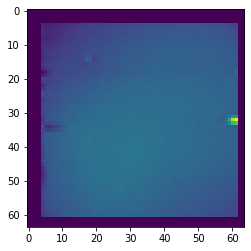

In [20]:
plt.imshow(tel_cor['225'][0].data[500])

In [21]:
med = np.nanmedian(np.dstack(tel_cor['225'][0].data), axis=2)

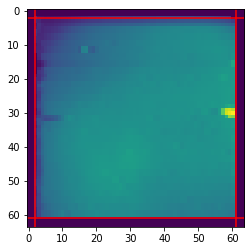

In [22]:
plt.imshow(med)
plt.axhline(y=61, color='r')
plt.axhline(y=2, color='r')
plt.axvline(x=2, color='r')
plt.axvline(x=61, color='r')

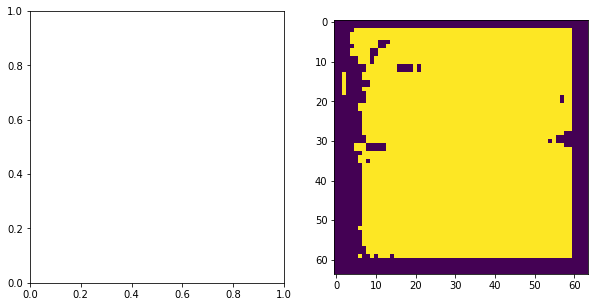

In [136]:
def get_mask(imgs):
    
    med = np.nanmedian(np.dstack(imgs[0].data), axis=2)
    
    rolled = med - np.roll(med,2)
    
    mask = abs(med - np.roll(med,2)) < 0.4*np.std(med - np.roll(med,2))

    #Mask out Border
    #TO DO: Maybe automate finding this region?
    mask[0:2,:] = False
    mask[:,0:2] = False
    mask[60:,:] = False
    mask[:,60:] = False
    
    return mask
    
    

fig, ax = plt.subplots(1,2, figsize=(10,5))

mask = get_mask(tel_cor['225'])

ax[1].imshow(mask)

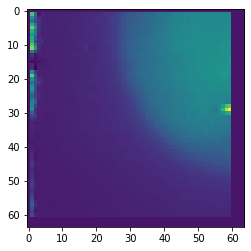

In [105]:
%matplotlib inline
plt.imshow(tel_cor['225'][1].data[2000])
plt.show()

# Examine Location of Spurious Patches

<IPython.core.display.Javascript object>


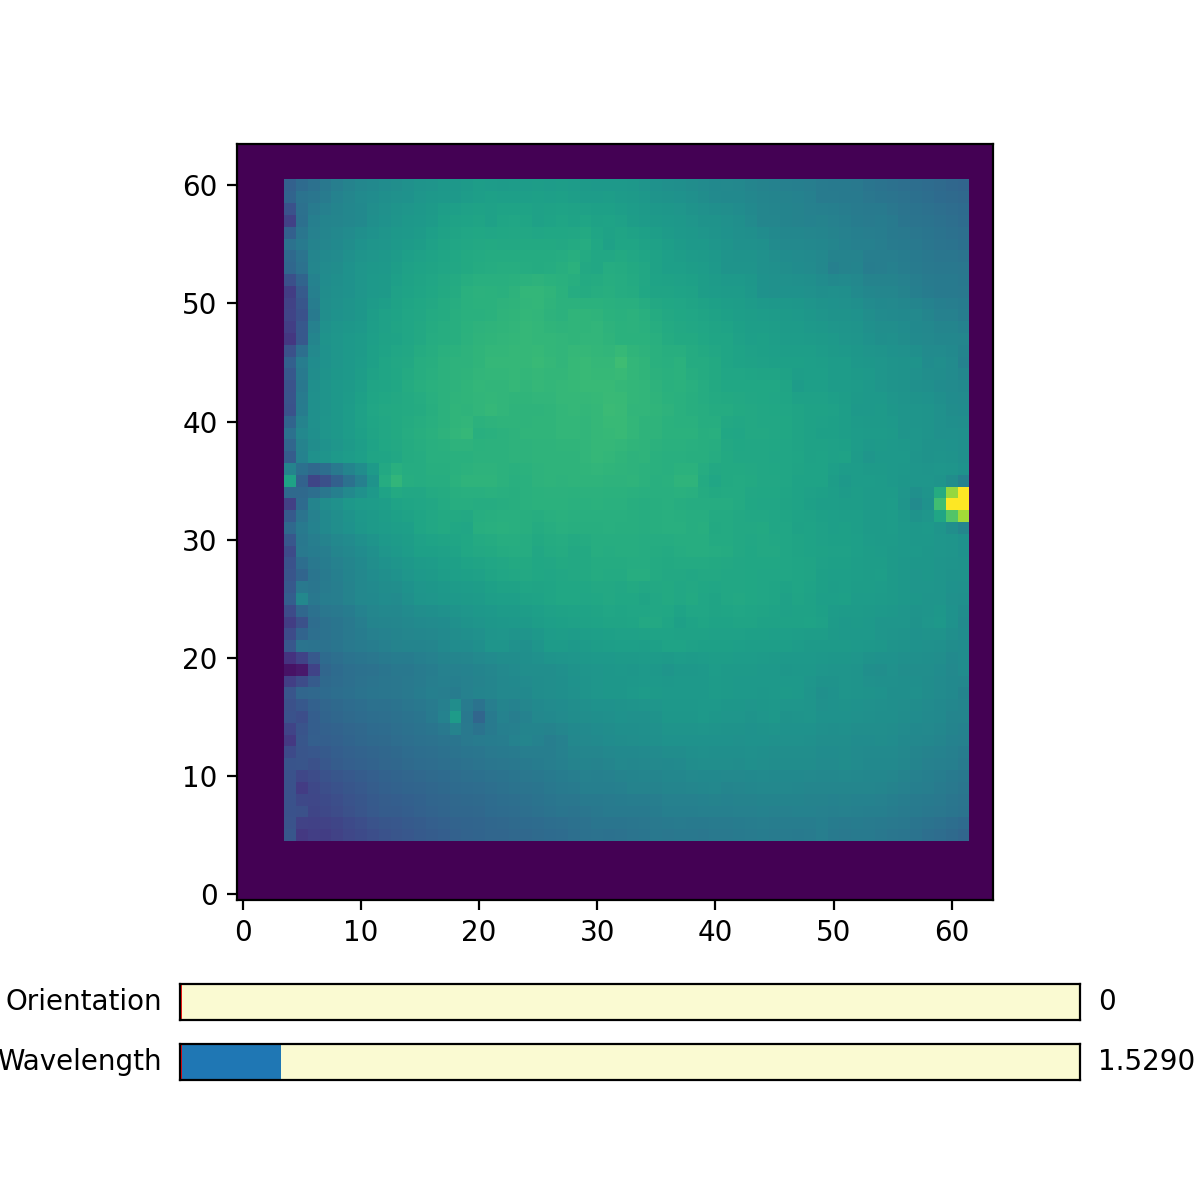

In [9]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

fig, ax = plt.subplots(figsize=(6,6))
plt.subplots_adjust(bottom=0.25)

imgs = tel_cor['225']
img_idx = 0
wave_idx = 0
#h = tel_cor['225'][0].header

l = plt.imshow(imgs[img_idx].data[wave_idx], origin='lower')#, vmin=0, vmax=0.02)

#Convert Pixel to Wavelength
NUM = imgs[img_idx].data.shape[0]
wave = get_wave(imgs[img_idx])
wave_shifted = wave[1:]

#Image slider for wavelength
axslider = plt.axes([0.15, 0.1, 0.75, 0.03], facecolor='lightgoldenrodyellow')
wave_slider = Slider(axslider, 'Wavelength', 
                    np.min(wave), np.max(wave), 
                    valinit=np.min(wave), valstep=wave[1]-wave[0],
                    valfmt="%.4f")

def compute_wave_index(v):
    for i in range(len(wave)):
        if wave[i] <= v and wave_shifted[i] > v:
            return i
    return i

def update_wave(val):
    global wave_idx
    wave_idx = compute_wave_index(wave_slider.val)
    l.set_data(imgs[img_idx].data[wave_idx])
    l.set_clim(get_clim())
    fig.canvas.draw_idle()
    
def get_clim():
    global img_idx
    global wave_idx
    
    cmin=0
    
    if img_idx == 0:
        if wave_idx <= 985:
            cmax=0.02
        else:
            cmax=0.01
    else:
        if wave_idx <= 985:
            cmax=0.015
        else:
            cmax=0.01
    return cmin, cmax

#Image slider for Observation (center (0), vs. 4 corners)
axslider2 = plt.axes([0.15, 0.15, 0.75, 0.03], facecolor='lightgoldenrodyellow')
img_slider = Slider(axslider2, 'Orientation', 0, 5, valstep=1, valinit=0, valfmt='%d')

def update_img(val):
    global img_idx
    img_idx = int(img_slider.val)
    l.set_data(imgs[img_idx].data[wave_idx])
    l.set_clim(get_clim())
    fig.canvas.draw_idle()
    


wave_slider.on_changed(update_wave)
img_slider.on_changed(update_img)


plt.show()

<IPython.core.display.Javascript object>


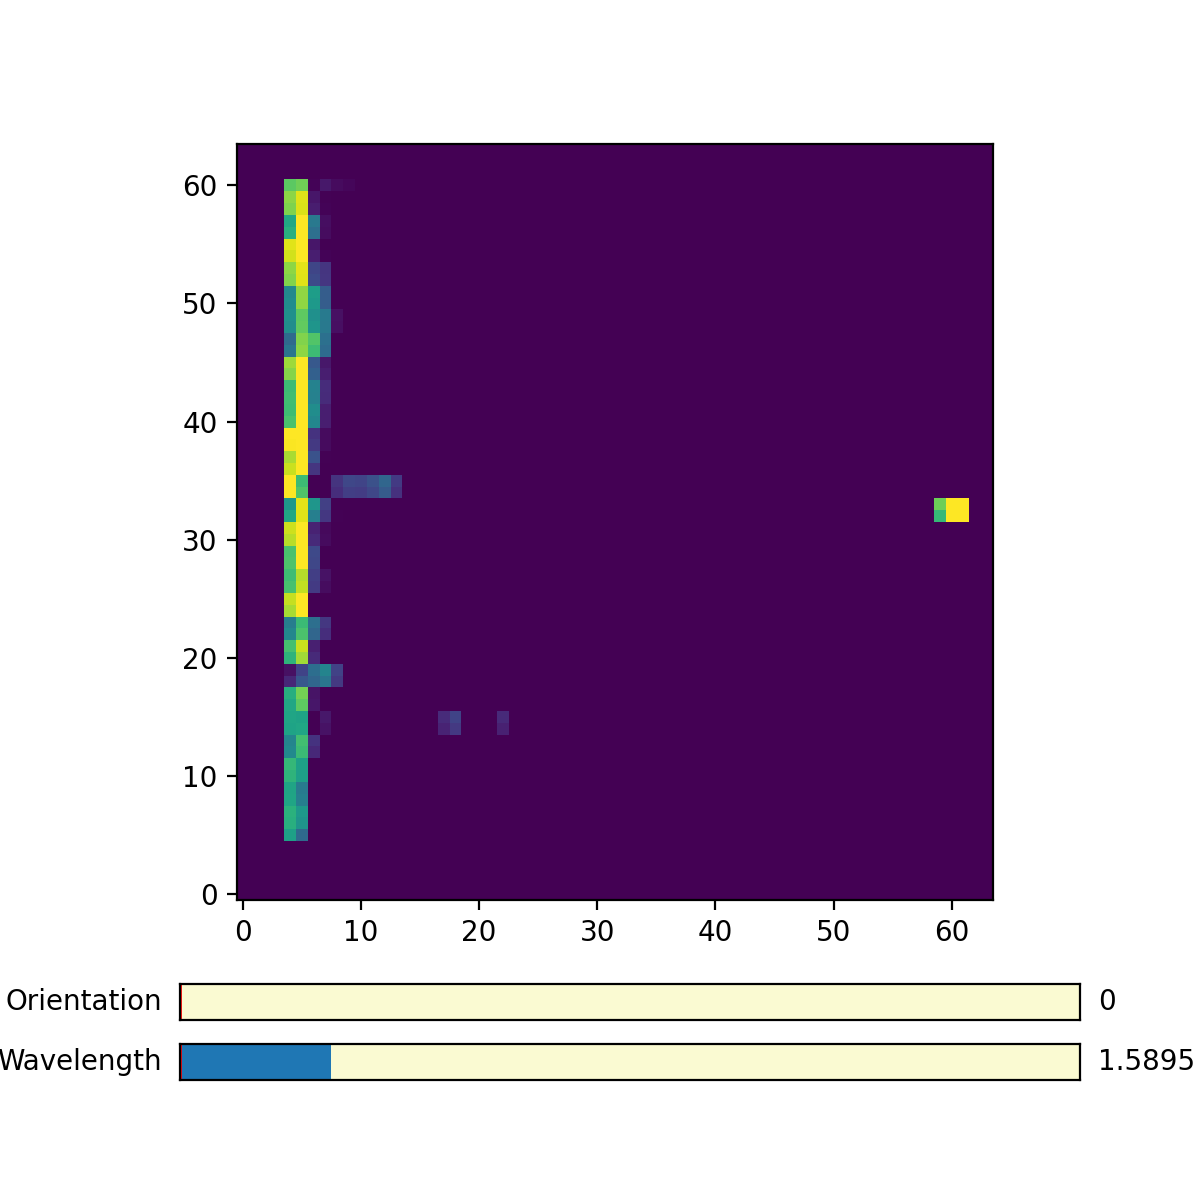

In [8]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

fig, ax = plt.subplots(figsize=(6,6))
plt.subplots_adjust(bottom=0.25)

imgs = ImageSet([Image(_data=img.data-np.roll(img.data,2), header=img.header) 
                 for img in tel_cor['225']])
img_idx = 0
wave_idx = 0
#h = tel_cor['225'][0].header

l = plt.imshow(imgs[img_idx].data[wave_idx], origin='lower')#, vmin=0, vmax=0.02)

#Convert Pixel to Wavelength
NUM = imgs[img_idx].data.shape[0]
wave = get_wave(imgs[img_idx])
wave_shifted = wave[1:]

#Image slider for wavelength
axslider = plt.axes([0.15, 0.1, 0.75, 0.03], facecolor='lightgoldenrodyellow')
wave_slider = Slider(axslider, 'Wavelength', 
                    np.min(wave), np.max(wave), 
                    valinit=np.min(wave), valstep=wave[1]-wave[0],
                    valfmt="%.4f")

def compute_wave_index(v):
    for i in range(len(wave)):
        if wave[i] <= v and wave_shifted[i] > v:
            return i
    return i

def update_wave(val):
    global wave_idx
    wave_idx = compute_wave_index(wave_slider.val)
    l.set_data(imgs[img_idx].data[wave_idx])
    l.set_clim(get_clim())
    fig.canvas.draw_idle()
    
def get_clim():
    global img_idx
    global wave_idx
    
    #return 0,0.01
    cmin=0.001

    if img_idx == 0:
        cmax=0.008
    else:
        cmax=0.003
    return cmin, cmax

#Image slider for Observation (center (0), vs. 4 corners)
axslider2 = plt.axes([0.15, 0.15, 0.75, 0.03], facecolor='lightgoldenrodyellow')
img_slider = Slider(axslider2, 'Orientation', 0, 5, valstep=1, valinit=0, valfmt='%d')

def update_img(val):
    global img_idx
    img_idx = int(img_slider.val)
    l.set_data(imgs[img_idx].data[wave_idx])
    l.set_clim(get_clim())
    fig.canvas.draw_idle()
    


wave_slider.on_changed(update_wave)
img_slider.on_changed(update_img)


plt.show()

In [ ]:
### Identify 'box' of lit pixels and align (for each wavelength)

<IPython.core.display.Javascript object>


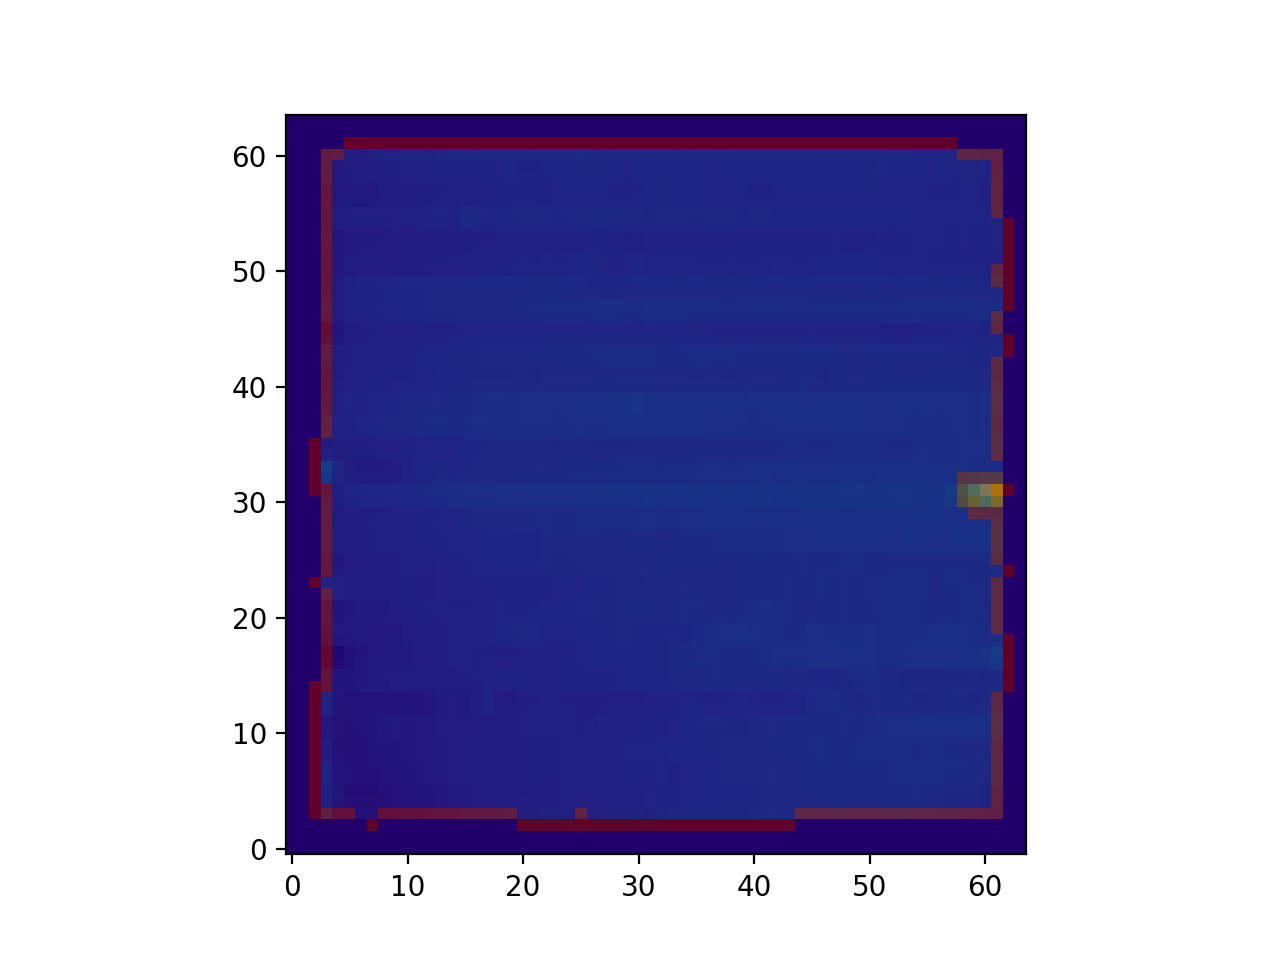

In [28]:
import skimage
import skimage.feature
import sys

image = copy.deepcopy(tel_cor['225'][0].data[1000])
#viewer = skimage.viewer(image=image)
#viewer.show()

edges = skimage.feature.canny(
    image=image,
    sigma=1,
    low_threshold=0,
    high_threshold=0.01,
)

plt.imshow(image, origin='lower')
plt.imshow(edges, 'jet', origin='lower', alpha=0.5)

plt.show()

<IPython.core.display.Javascript object>


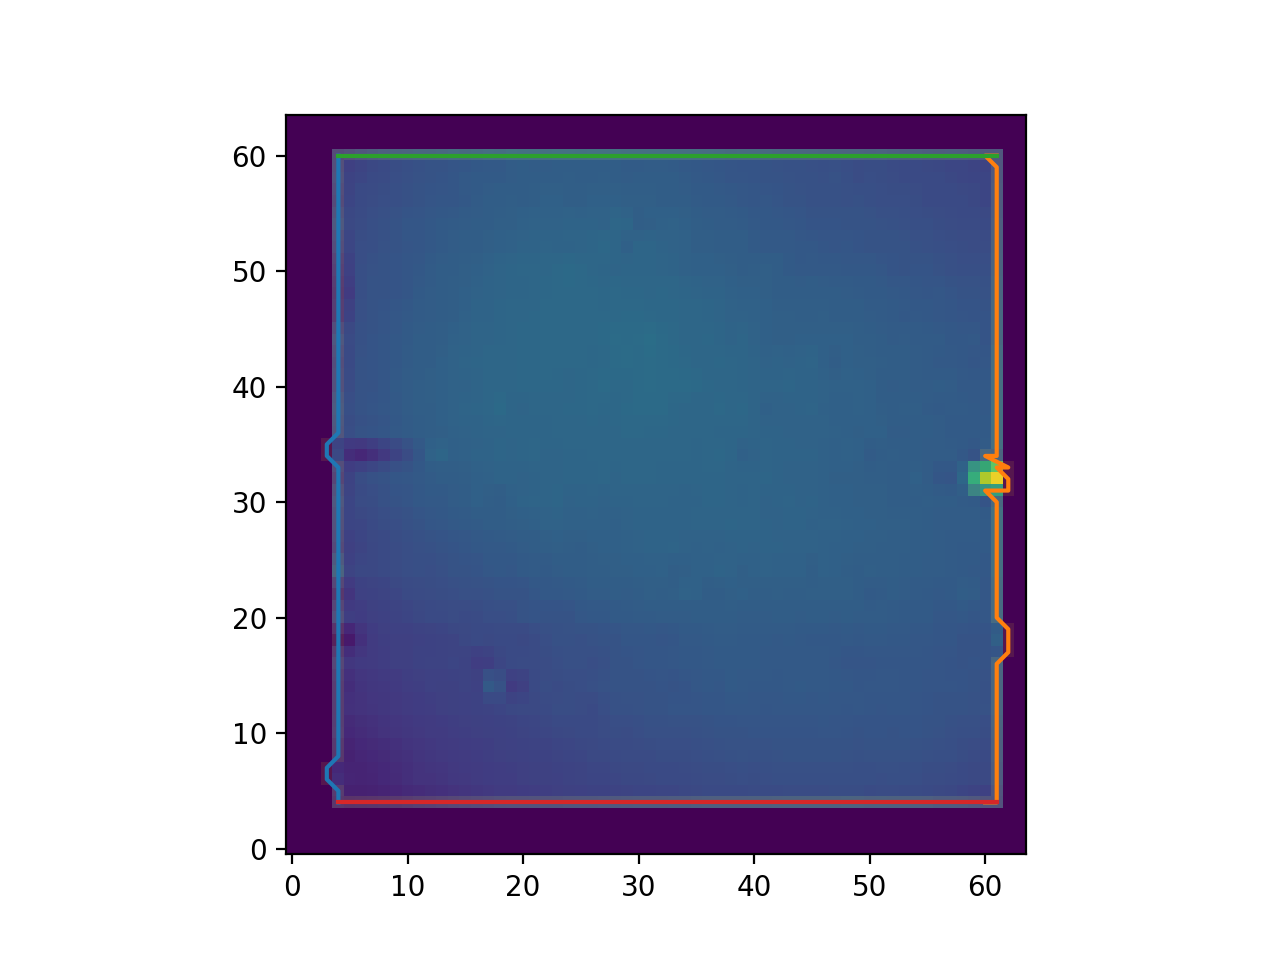

In [27]:
image = copy.deepcopy(tel_cor['225'][0].data[500])
#viewer = skimage.viewer(image=image)
#viewer.show()

edges = skimage.feature.canny(
    image=image,
    sigma=1,
    low_threshold=0,
    high_threshold=0.01,
)


edge_indices = [(i,j) for i,j in zip(np.where(edges==True)[0], np.where(edges==True)[1])]

edge_x, edge_y = np.where(edges==True)[0], np.where(edges==True)[1]

plt.imshow(image)
plt.imshow(edges, origin='lower', alpha=0.1)

s1_x = [x for (y,x) in edge_indices if x<min(edge_x)+1]
s1_y = [y for (y,x) in edge_indices if x<min(edge_x)+1]
#fit1 = np.poly1d(np.polyfit(s1_x, s1_y, 1))(np.unique(s1_x))
#plt.plot(np.unique(s1_x), fit1)
plt.plot(s1_x,s1_y)

s2_x = [x for (y,x) in edge_indices if x>max(edge_x)-1]
s2_y = [y for (y,x) in edge_indices if x>max(edge_x)-1]
#m,b = np.polyfit(s2_x, s2_y, 1)
#plt.plot(s2_x, m*np.array(s2_x)+b)
plt.plot(s2_x, s2_y)

s3_x = [x for (y,x) in edge_indices if y>max(edge_x)-1]
s3_y = [y for (y,x) in edge_indices if y>max(edge_x)-1]
#m,b = np.polyfit(s3_x, s3_y, 1)
#plt.plot(s3_x, m*np.array(s3_x)+b)
plt.plot(s3_x, s3_y)

s4_x = [x for (y,x) in edge_indices if y<min(edge_x)+1]
s4_y = [y for (y,x) in edge_indices if y<min(edge_x)+1]
#m,b = np.polyfit(s4_x, s4_y, 1)
#plt.plot(s4_x, m*np.array(s4_x)+b)
plt.plot(s4_x, s4_y)

plt.show()

In [ ]:
#Get 4 corners, treat as a box
#Only have to 


In [74]:
xs = [corner.ravel()[0] for corner in corners]
ys = [corner.ravel()[1] for corner in corners]
print(xs)

[61, 4, 61, 4]


<IPython.core.display.Javascript object>


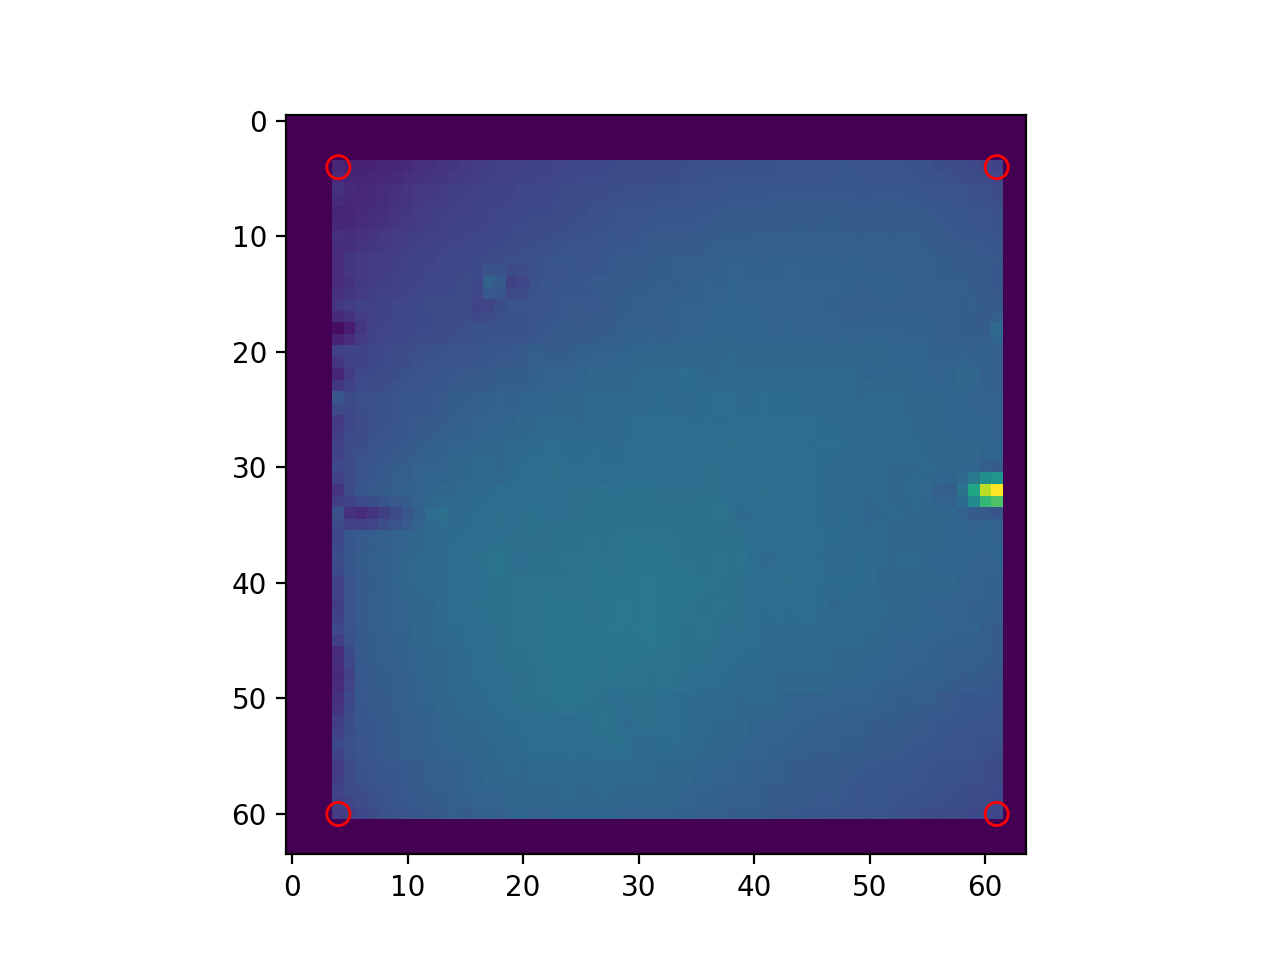

In [81]:
%matplotlib notebook
import cv2 
  
image = tel_cor['225'][0].data[500]
gray = image/image.max()
gray = np.float32(gray)

thres = np.float32(np.reshape([1 if gray[i,j]>0.05 else 0 for i in range(64) for j in range(64)], (64,64)))

corners = cv2.goodFeaturesToTrack(thres, 4, 0.01, 10)
corners = np.int0(corners)

fig, ax = plt.subplots()

for corner in corners:
    x,y = corner.ravel()
    circle=plt.Circle((x,y),1, color='r', fill=None)
    ax.add_artist(circle)

#for i in range(4):
   # x_values = [corners[i].ravel()[0], corners[i+1].ravel()[0]]
   # y_values = [corners[i].ravel()[1], corners[i+1].ravel()[1]]
    #ax.plot(x_values, y_values)
    
plt.imshow(image)
plt.show()

In [375]:
#image = tel_cor['225'][0].data[500]

def find_corners(img, thres=0.01):
    """Identify the x and y coordinates of the corners of the image inset """
    
    try:
        gray = img/np.max(img)
        thres_img = np.float32(np.reshape([1 if gray[i,j]>thres else 0 
                                    for i in range(64) for j in range(64)], (64,64)))

        candidates = cv2.goodFeaturesToTrack(thres_img, 4, 0.01, 10)
        candidates = np.array([[int(corner[0][0]), int(corner[0][1])] for corner in candidates])
    
        ll = (np.min(candidates[:,0]), np.min(candidates[:,1]))
        lr = (np.min(candidates[:,0]), np.max(candidates[:,1]))
        ul = (np.max(candidates[:,0]), np.min(candidates[:,1]))
        ur = (np.max(candidates[:,0]), np.max(candidates[:,1]))
        
        return np.array([ll,lr,ur,ul])
    
    except TypeError:
        #No corners found
        return None

def plot_corners(ax, corners):
    
    if corners is not None:
        #Try to find corners
        for corner in corners:
            x,y = corner#.ravel()
            circle=plt.Circle((x,y),1, color='r', fill=None)
            ax.add_artist(circle)
        return ax
    else:
        return ax

In [371]:
c = np.array(find_corners(med_imgs[100]))

## Check corner detection

<IPython.core.display.Javascript object>


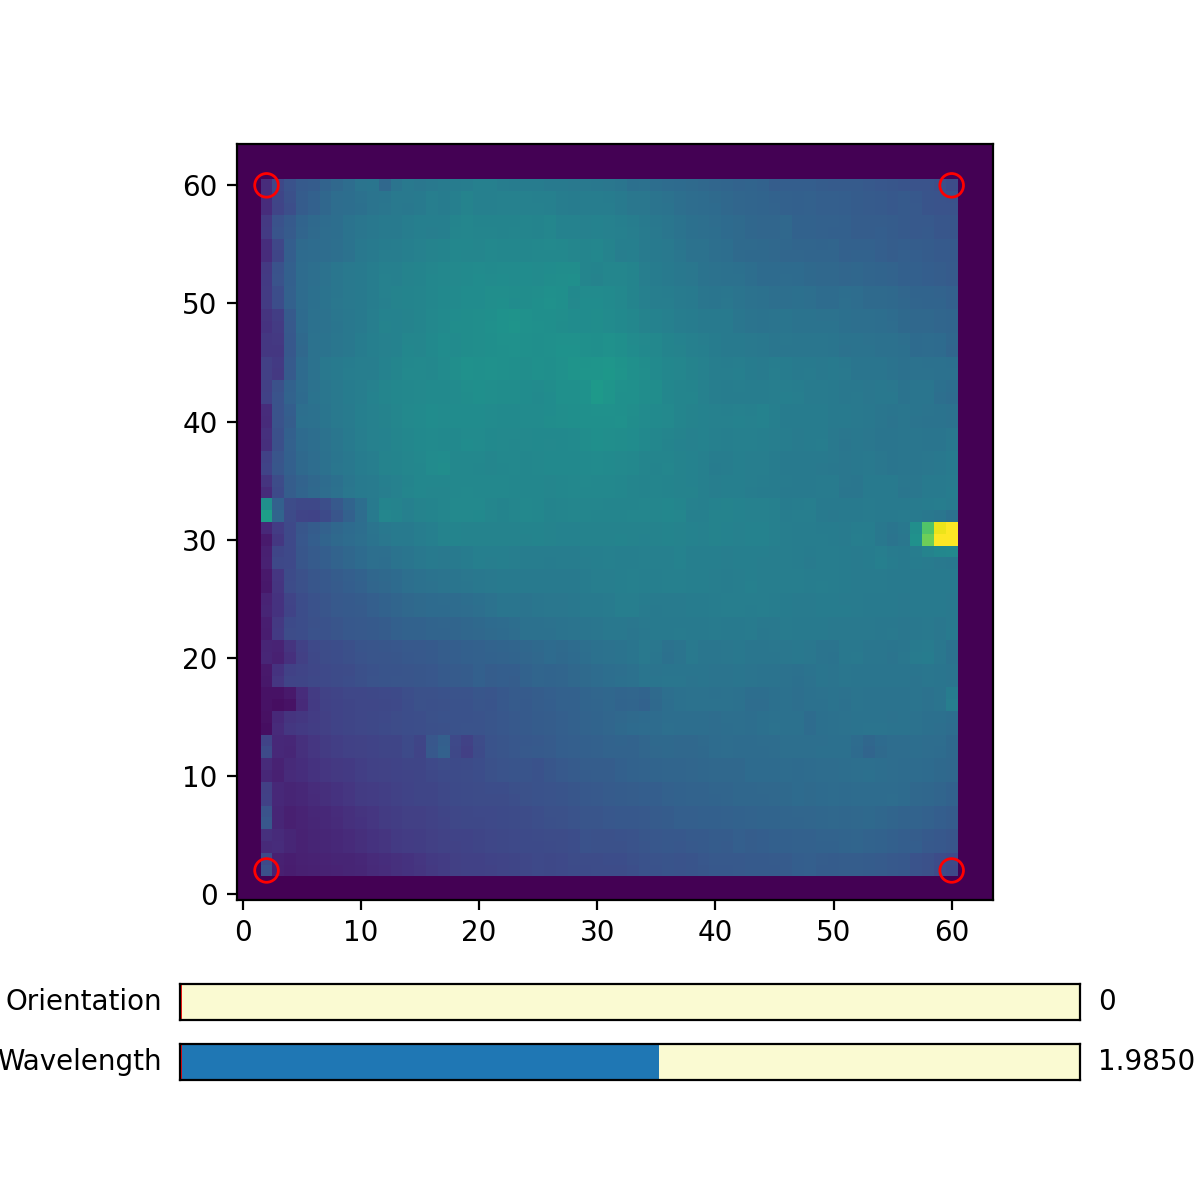

/Users/ryleighfitzpatrick/miniconda3/envs/EuropaVLT/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


In [376]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

fig, ax = plt.subplots(figsize=(6,6))
plt.subplots_adjust(bottom=0.25)

imgs = tel_cor['225']
img_idx = 0
wave_idx = 0

#Get corners
med_imgs = np.zeros(imgs[0].shape)
for j in range(len(imgs[0].data)):
    med = np.nanmedian([im.data[j] for im in imgs], axis=0)
    med[np.isnan(med)] = 0
    med_imgs[j] = med
    
corners = [find_corners(med) for med in med_imgs]


l = ax.imshow(imgs[img_idx].data[wave_idx], origin='lower')#, vmin=0, vmax=0.02)
#Initialize circles for corners
circles = [plt.Circle((0,0),1, color='r', fill=None, alpha=0), plt.Circle((0,0),1, color='r', fill=None, alpha=0),
          plt.Circle((0,0),1, color='r', fill=None, alpha=0), plt.Circle((0,0),1, color='r', fill=None, alpha=0)]
for circle in circles:
    ax.add_artist(circle)

#Convert Pixel to Wavelength
NUM = imgs[img_idx].data.shape[0]
wave = get_wave(imgs[img_idx])
wave_shifted = wave[1:]

#Image slider for wavelength
axslider = plt.axes([0.15, 0.1, 0.75, 0.03], facecolor='lightgoldenrodyellow')
wave_slider = Slider(axslider, 'Wavelength', 
                    np.min(wave), np.max(wave), 
                    valinit=np.min(wave), valstep=wave[1]-wave[0],
                    valfmt="%.4f")

def compute_wave_index(v):
    for i in range(len(wave)):
        if wave[i] <= v and wave_shifted[i] > v:
            return i
    return i

def update_wave(val):
    global wave_idx
    wave_idx = compute_wave_index(wave_slider.val)
    l.set_data(imgs[img_idx].data[wave_idx])
    l.set_clim(get_clim())
    new_circles = corners[wave_idx]
    if new_circles is None:
        for circ in circles:
            circ.set_alpha(0)
    else:
        for i,circ in enumerate(circles):
            circ.center = new_circles[i][0], new_circles[i][1]   
            circ.set_alpha(1)
    fig.canvas.draw_idle()
    
def get_clim():
    global img_idx
    global wave_idx
    
    cmin=0
    
    if img_idx == 0:
        if wave_idx <= 985:
            cmax=0.02
        else:
            cmax=0.01
    else:
        if wave_idx <= 985:
            cmax=0.015
        else:
            cmax=0.01
    return cmin, cmax

#Image slider for Observation (center (0), vs. 4 corners)
axslider2 = plt.axes([0.15, 0.15, 0.75, 0.03], facecolor='lightgoldenrodyellow')
img_slider = Slider(axslider2, 'Orientation', 0, 4, valstep=1, valinit=0, valfmt='%d')

def update_img(val):
    global img_idx
    img_idx = int(img_slider.val)
    l.set_data(imgs[img_idx].data[wave_idx])
    l.set_clim(get_clim())
    new_circles = corners[wave_idx]
    if new_circles is None:
        for circ in circles:
            circ.set_alpha(0)
    else:
        for i,circ in enumerate(circles):
            circ.center = new_circles[i][0], new_circles[i][1]  
            circ.set_alpha(1)
    fig.canvas.draw_idle()
    


wave_slider.on_changed(update_wave)
img_slider.on_changed(update_img)


plt.show()

In [410]:
def get_offsets(corners):
    refx = np.min(np.array([corner for corner in corners if corner is not None])[:,:,0])
    refy = np.min(np.array([corner for corner in corners if corner is not None])[:,:,1])
    
    
    
    offsets = [(corner[0][0]-refx, corner[0][1]-refy) if corner is not None else None for corner in corners ]
    return np.array(offsets)
    

In [ ]:
#Get corners
med_imgs = np.zeros(imgs[0].shape)
for j in range(len(imgs[0].data)):
    med = np.nanmedian([im.data[j] for im in imgs], axis=0)
    med[np.isnan(med)] = 0
    med_imgs[j] = med
    
corners = [find_corners(med) for med in med_imgs]

In [423]:
np.max([offset[0] for offset in offsets if offset is not None])

12

In [426]:
offsets = np.array(get_offsets(corners))

max_offx = np.max([offset[0] for offset in offsets if offset is not None])
max_offy = np.max([offset[1] for offset in offsets if offset is not None])

offset_imgs = np.zeros((imgs[0].data.shape[0], imgs[0].data.shape[1]+max_offx, imgs[0].data.shape[2]+max_offy))

for i,img in enumerate(imgs):
    if offsets[i] is not None:
        offset_imgs[i,offsets[i][0]:offsets[i][0]+64,offsets[i][1]:offsets[i][1]+64] = img.data
    else:
        offset_imgs[i,:64,:64] = img.data

ValueError: could not broadcast input array from shape (2172,64,64) into shape (64,64)

In [ ]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

fig, ax = plt.subplots(figsize=(6,6))
plt.subplots_adjust(bottom=0.25)

imgs = tel_cor['225']
img_idx = 0
wave_idx = 0


l = ax.imshow(imgs[img_idx].data[wave_idx], origin='lower')#, vmin=0, vmax=0.02)

#Convert Pixel to Wavelength
NUM = imgs[img_idx].data.shape[0]
wave = get_wave(imgs[img_idx])
wave_shifted = wave[1:]

#Image slider for wavelength
axslider = plt.axes([0.15, 0.1, 0.75, 0.03], facecolor='lightgoldenrodyellow')
wave_slider = Slider(axslider, 'Wavelength', 
                    np.min(wave), np.max(wave), 
                    valinit=np.min(wave), valstep=wave[1]-wave[0],
                    valfmt="%.4f")

def compute_wave_index(v):
    for i in range(len(wave)):
        if wave[i] <= v and wave_shifted[i] > v:
            return i
    return i

def update_wave(val):
    global wave_idx
    wave_idx = compute_wave_index(wave_slider.val)
    l.set_data(imgs[img_idx].data[wave_idx])
    l.set_clim(get_clim())
    new_circles = corners[wave_idx]
    if new_circles is None:
        for circ in circles:
            circ.set_alpha(0)
    else:
        for i,circ in enumerate(circles):
            circ.center = new_circles[i][0], new_circles[i][1]   
            circ.set_alpha(1)
    fig.canvas.draw_idle()
    
def get_clim():
    global img_idx
    global wave_idx
    
    cmin=0
    
    if img_idx == 0:
        if wave_idx <= 985:
            cmax=0.02
        else:
            cmax=0.01
    else:
        if wave_idx <= 985:
            cmax=0.015
        else:
            cmax=0.01
    return cmin, cmax

#Image slider for Observation (center (0), vs. 4 corners)
axslider2 = plt.axes([0.15, 0.15, 0.75, 0.03], facecolor='lightgoldenrodyellow')
img_slider = Slider(axslider2, 'Orientation', 0, 4, valstep=1, valinit=0, valfmt='%d')

def update_img(val):
    global img_idx
    img_idx = int(img_slider.val)
    l.set_data(imgs[img_idx].data[wave_idx])
    l.set_clim(get_clim())
    new_circles = corners[wave_idx]
    if new_circles is None:
        for circ in circles:
            circ.set_alpha(0)
    else:
        for i,circ in enumerate(circles):
            circ.center = new_circles[i][0], new_circles[i][1]  
            circ.set_alpha(1)
    fig.canvas.draw_idle()
    


wave_slider.on_changed(update_wave)
img_slider.on_changed(update_img)


plt.show()

In [167]:
def combine_observations(imgs):
    """ Combine image data cubes using telemetry data in header.""" 
    
    combined = np.zeros((128,128))
    combined_cube = np.zeros((imgs[0].data.shape[0],128,128))
    
    #Limits beyond which data is bad
    mini = 100 #1.457
    maxi = 2050 #2.432
    
    mask = get_mask(imgs) #To Do: Update this to get better mask
    
    comb_mask = np.zeros((128,128))
        #0: no data, 1: data from cen img
    comb_mask[32:96, 32:96] = np.reshape([1 if mask[x,y] else 0 for x in range(64) 
                                              for y in range(64)], (64,64))

   # for k in range(mini, maxi):
        
    for i in range(1,len(imgs)):
        #Get location of each image relative to image 0

        #Get x and y shift (in pixels)
        x_shift, y_shift = get_img_shift(imgs[0].header['CRVAL1'], 
                                      imgs[0].header['CRVAL2'], 
                                      imgs[i].header['CRVAL1'], 
                                      imgs[i].header['CRVAL2'])


        new_cen = (64-int(y_shift), 64+int(x_shift))

        # Determine overlap region
        ox, oy = get_overlap(x_shift, y_shift)        

        #Cut out overlap regions from each image
        shared0 = copy.copy(imgs[0].data[:, int(ox[0])-32:
                                           int(ox[1]-32),
                                           int(oy[0]-32):
                                           int(oy[1]-32)])
        
        sx1, sx2 = abs(int(ox[0]-new_cen[1]+32)), abs(int(ox[1]-new_cen[1]+32))
        sy1, sy2 = abs(int(oy[0]-new_cen[0]+32)), abs(int(oy[1]-new_cen[0]+32))
        if sx1 > sx2:
            sx2, sx1 = abs(int(ox[0]-new_cen[1]+32)), abs(int(ox[1]-new_cen[1]+32))
            sy1, sy2 = abs(int(oy[0]-new_cen[0]+32)), abs(int(oy[1]-new_cen[0]+32))
        if sy1 > sy2:
            sy2, sy1 = abs(int(oy[0]-new_cen[0]+32)), abs(int(oy[1]-new_cen[0]+32))

        shared1 = copy.copy(imgs[i].data[:, sy1:sy2, sx1:sx2])

        wave = get_wave(imgs[i])

        #Get indices for sum (excluding 1.8-1.92 microns)
        idx = (wave>1.92)+(wave<1.8)
        indices = np.where(idx)[0]
        indices = [i for i in indices if i>mini and i<maxi]
        
        
        #TO DO: Median combine pixels instead of summing
        #TO DO: Test different combination methods
        
        #Sum across desired wavelenths (indices) for all pixels 
        # in the overlap region
        R_cen = np.nansum([shared0[:,i,j][indices] for i in 
                    range(shared0.shape[1]) for j in
                    range(shared0.shape[2])])
        
        R_ecc = np.nansum([shared1[:,i,j][indices] for i in 
                    range(shared1.shape[1]) for j in
                    range(shared1.shape[2])])
        
        #Scale factor
        f = R_ecc/R_cen

            #Plot overlap region to see if it worked
            #fig, ax = plt.subplots()
            #plt.imshow(combined)
            #import matplotlib.patches as patches
            #rect = patches.Rectangle((ox[0],oy[0]),(ox[1]-ox[0]),
            #                         (oy[1]-oy[0]),
            #                         linewidth=1,edgecolor='r',
            #                         facecolor='none')
            #ax.add_patch(rect)
        
        #Crop image to [1:60,1:60] and paste on top of center
        #combined[new_cen[0]-31:new_cen[0]+28, 
            #new_cen[1]-31:new_cen[1]+28] = f*imgs[i].data[k][1:60,1:60]
        
        #Make a combined mask
            #0: no data
            #1: data from cen img [0]
            #2: data from outer img [i]
            #3: average data from both
            
        comb_mask[new_cen[0]-32:new_cen[0]+32, 
                  new_cen[1]-32:new_cen[1]+32] = np.reshape(
                                [3 if mask[x,y] and comb_mask[new_cen[0]-32+x,new_cen[1]-33+y] == 1
                                else 2 if mask[x,y] else comb_mask[new_cen[0]-32+x,new_cen[1]-33+y]
                                for x in range(64) for y in range(64)], (64,64))
            
        #plt.imshow(comb_mask)
        #plt.show()
        
        for k in range(imgs[0].data.shape[0]):
            #Loop through 3D image cube
            if i==1:
                combined = np.reshape([imgs[0].data[k,x-32,y-32] if comb_mask[x,y] == 1
                        else imgs[i].data[k,x-new_cen[0]-32,y-new_cen[1]-32] if comb_mask[x,y] == 2
                        else np.mean([imgs[0].data[k,x-32,y-32],
                                      imgs[i].data[k,x-new_cen[0]-32,y-new_cen[1]-32]])
                        if comb_mask[x,y] == 3 else 0.0 for x in range(128)
                        for y in range(128)], (128,128))
            elif i==2:
                combined = np.reshape([imgs[0].data[k,x-32,y-32] if comb_mask[x,y] == 1
                        else imgs[i].data[k,x-new_cen[0]+32,y-new_cen[1]+32] if comb_mask[x,y] == 2
                        else np.mean([imgs[0].data[k,x-32,y-32],
                                      imgs[i].data[k,x-new_cen[0]+32,y-new_cen[1]]+32])
                        if comb_mask[x,y] == 3 else 0.0 for x in range(128)
                        for y in range(128)], (128,128))
            elif i==3:
                combined = np.reshape([imgs[0].data[k,x-32,y-32] if comb_mask[x,y] == 1
                        else imgs[i].data[k,x-new_cen[0]-32,y-new_cen[1]+32] if comb_mask[x,y] == 2
                        else np.mean([imgs[0].data[k,x-32,y-32],
                                      imgs[i].data[k,x-new_cen[0]-32,y-new_cen[1]]+32])
                        if comb_mask[x,y] == 3 else 0.0 for x in range(128)
                        for y in range(128)], (128,128))
            elif i==4:
                combined = np.reshape([imgs[0].data[k,x-32,y-32] if comb_mask[x,y] == 1
                        else imgs[i].data[k,x-new_cen[0]-32,y-new_cen[1]-32] if comb_mask[x,y] == 2
                        else np.mean([imgs[0].data[k,x-32,y-32],
                                      imgs[i].data[k,x-new_cen[0]-32,y-new_cen[1]-32]+32])
                        if comb_mask[x,y] == 3 else 0.0 for x in range(128)
                        for y in range(128)], (128,128))
                
                
            
            #plt.imshow(combined)
            #plt.show()
            #To Do: Fix this work around!!!
            if i == 1:
                combined_cube[k] = combined
            elif i==2:
                combined_cube[k][64:,64:] = combined[64:,64:]
            elif i==3:
                combined_cube[k][0:64,64:] = combined[0:64,64:]
            elif i ==4:
                combined_cube[k][0:64,0:64] = combined[0:64,0:64]
        
        print('Finished: i=', i)
        
        
        #np.reshape([tel_cor['225'][0].data[k,x,y] if mask[x,y] else 0 
                        #for i in range(64) for j in range(64)], (64,64))
        
        
        #Crop center image
        #cen_img = copy.copy(imgs[0].data[i][1:60,4:60])
     
        #mask = combined>0
        #cen_mask = (cen_img>0)*\
           #(cen_img<(0.6*np.max(cen_img)))
    
        
        #for x in range(33,92):
        #    for y in range(36,92):
         #       if cen_mask[x-33,y-36]:
          #          combined[x,y] = cen_img[x-33,y-36]
           #     elif mask[x,y]:
            #        combined[x,y] = combined[x,y]
             #   else:
              #      combined[x,y] = None
        
        #combined_cube[k] = combined  
    
    #return combined_cube
    return combined_cube
    

In [168]:
imgs = copy.copy(tel_cor['225'])
test = combine_observations(imgs)


#fig, ax = plt.subplots(1,1, figsize=(10,10))
#plt.imshow(test[2000], origin='lower')

Finished: i= 1
Finished: i= 2
Finished: i= 3
Finished: i= 4


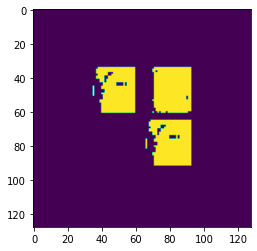

In [171]:
plt.imshow(test[2000])

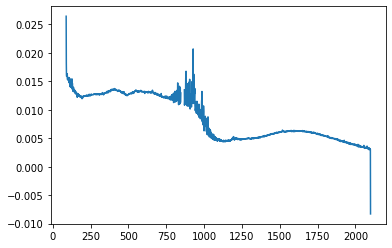

In [172]:
plt.plot(test[:,64,64])

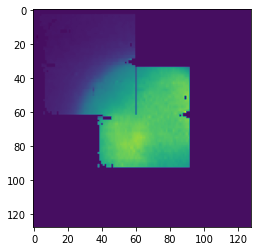

In [135]:
plt.imshow(test[2000])

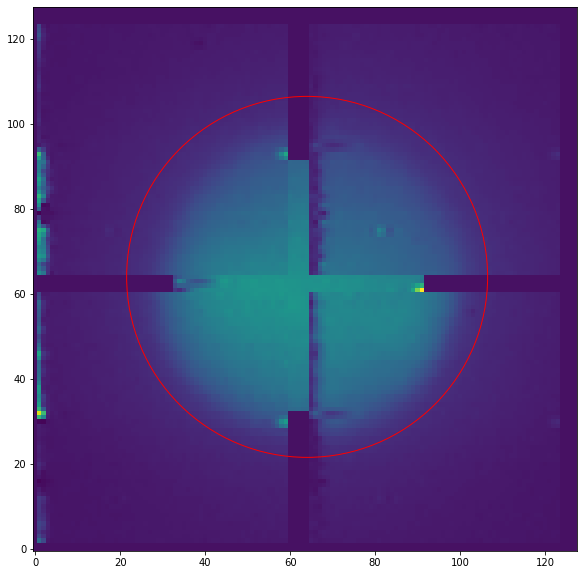

In [29]:

plt.imshow(combined, origin='lower')

europa_disk = plt.Circle((64, 64), 42.5, color='r', fill=False)
ax.add_artist(europa_disk)


In [88]:
std_Europa_30[0].header['ESO ADA POSANG']


0.0

In [199]:
t = type(Image(_data=np.array(test.getdata()), 
            header=std_Europa_30[0].header))

<class 'PIL.Image.Image'>


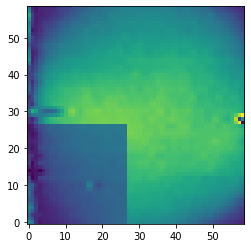

In [197]:
test = combine_frames(std_Europa_30[0],std_Europa_30[1],
                      alpha=0.5)

#test2 = combine_frames(Image(_data=np.array(test.getdata()), 
                        #header=std_Europa_30[0].header),
                      #std_Europa_30[2],
                      #alpha=0.5)


plt.imshow(test, origin='lower')


In [138]:
def combine_frames(img1, img2, alpha=0.5):
    
    #Get x and y shifts
    x_shift, y_shift = get_img_shift(img1.header['CRVAL1'], 
                                  img1.header['CRVAL2'], 
                                  img2.header['CRVAL1'], 
                                  img2.header['CRVAL2'])
    
   # To Do: Move slicing to earlier step 
    # and implement for all wavelengths
    combined = shift_and_combine(img1.data[2000][1:60,1:60], 
                                 img2.data[2000][1:60,1:60], 
                                 x_shift, y_shift, alpha=alpha)
    print(type(combined))
    return combined
    

In [137]:
def shift_and_combine(img1, img2, x_shift, y_shift, alpha=0.5):

    import operator
    import PIL
    #from PIL import Image
    #from PIL import ImageDraw
    
    # suppose img1 and img2 are your two images
    img1 = PIL.Image.fromarray(np.uint8(255 * (img1) / 
                            (np.max(img2))), 'L')
    img2 = PIL.Image.fromarray(np.uint8(255 * (img2) / 
                            (np.max(img2))), 'L')

    # suppose img2 is to be shifted by `shift` amount 
    shift = (int(x_shift), int(y_shift))

    # compute the size of the panorama
    nw, nh = map(max, map(operator.add, img2.size, shift), img1.size)

    # paste img1 on top of img2
    newimg1 = PIL.Image.new('L', size=(nw, nh))
    newimg1.paste(img2, shift)
    newimg1.paste(img1, (0, 0))

    # paste img2 on top of img1
    newimg2 = PIL.Image.new('L', size=(nw, nh))
    newimg2.paste(img1, (0, 0))
    newimg2.paste(img2, shift)

    # blend with alpha=0.5
    return PIL.Image.blend(newimg1, newimg2, alpha=alpha)

In [22]:
def get_img_shift(RA1, DEC1, RA2, DEC2, PA=0, 
                  plate_scale=(0.0125, 0.0125)):
    """ Return x,y shift in pixel space for image based on RA
    and DEC pointing information."""
    
    if PA == 0:
        #Make sure PA is 0
    
        delta_RA = RA1 - RA2
        delta_DEC = DEC1 - DEC2
    
        x_shift = delta_RA*3600 #in arcsec
        y_shift = delta_DEC*3600 #in arcsec
        
        return x_shift/plate_scale[0], y_shift/plate_scale[1]
    
    else:
        #TO DO: update to handle different PA
        return None